In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X = pd.read_csv('ECG_dataX.csv').to_numpy()
Y = pd.read_csv('ECG_dataY.csv').to_numpy()
fs = 125
Ts = 1/fs
N = 187
Duration = N * Ts
t = np.linspace(0, Duration-Ts, N)
X_r = np.reshape(X, (187,3841))
Y_r = np.reshape(Y, (1,3841)).flatten()

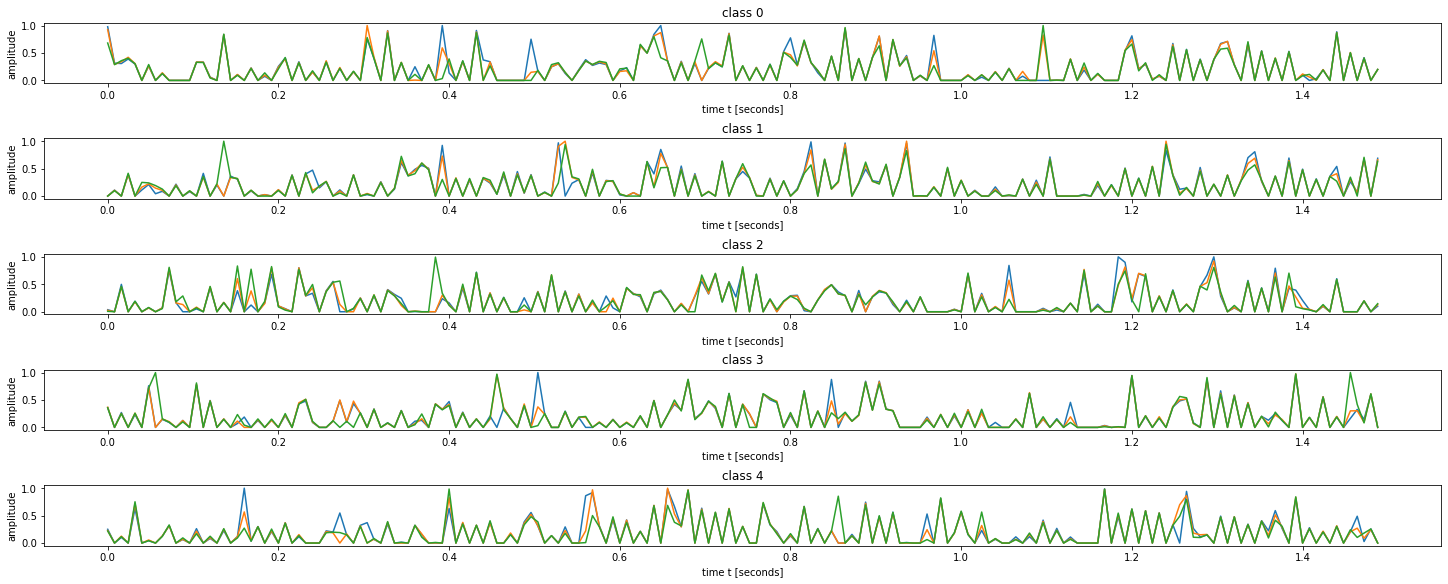

In [8]:
fig, axs = plt.subplots(5,1,constrained_layout=True, figsize=(20,8))
#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=10)
axs[0].set_title('class 0')
axs[0].set_xlabel('time t [seconds]')
axs[0].set_ylabel('amplitude')
axs[0].plot(t, X_r[:,:3])

axs[1].set_title('class 1')
axs[1].set_xlabel('time t [seconds]')
axs[1].set_ylabel('amplitude')
axs[1].plot(t, X_r[:,1086:1089])

axs[2].set_title('class 2')
axs[2].set_xlabel('time t [seconds]')
axs[2].set_ylabel('amplitude')
axs[2].plot(t, X_r[:,1882:1885])

axs[3].set_title('class 3')
axs[3].set_xlabel('time t [seconds]')
axs[3].set_ylabel('amplitude')
axs[3].plot(t, X_r[:,2470:2473])

axs[4].set_title('class 4')
axs[4].set_xlabel('time t [seconds]')
axs[4].set_ylabel('amplitude')
axs[4].plot(t, X_r[:,3216:3219])


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_r, test_size=0.2, random_state=0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
acc_train = model.score(X_train, Y_train)
acc_val = model.score(X_test, Y_test)    
print(acc_train)
print(acc_val)

0.841796875
0.8543563068920677


<AxesSubplot:>

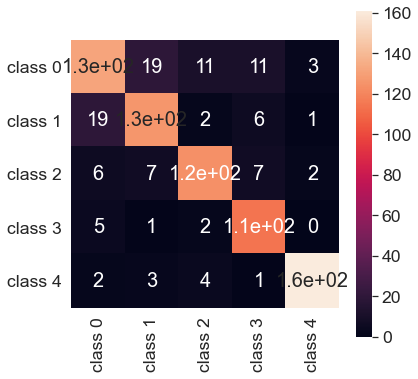

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(Y_test, Y_test_pred)
df_cm = pd.DataFrame(cm, index = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4'],
                     columns = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4'])
plt.figure(figsize = (6,6))
sn.set(font_scale=1.6)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 20}, square=True)

In [41]:
rng=np.random.RandomState(0)
idx_list=np.arange(0, X_train.shape[0])
rng.shuffle(idx_list)
train_idx=idx_list[0:2458]
val_idx=idx_list[2458:]

In [42]:
n_list=np.arange(1, 100, 5)
param_grid = {'n_neighbors':n_list}
from sklearn.model_selection import GridSearchCV
model=KNeighborsClassifier()
gs = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=[(train_idx, val_idx)])
gs.fit(X_train, Y_train)

GridSearchCV(cv=[(array([1430,  779,  643, ...,  747, 2806,  753]),
                  array([ 462, 1938,  673, 1201, 2752,  424,  325,  664,  350,  447,  709,
       1924, 1722, 1221, 1149,  387, 1369, 1337,  754, 2186,  451, 1194,
        699, 2247, 1608,  830,  950, 2713, 2444, 1734, 1413, 1409, 3053,
       2838, 1177, 2675, 2006, 1253, 2477,   21, 1305, 2440, 2298, 2900,
        671, 2882, 1941,  845,  694, 2919, 1353, 1133,  869,  604,  834,
       2515,  627,  902, 1747, 2051, 3042,  321,  6...
       3020, 2176,  802, 2076, 1207, 2930, 2558, 2723,  151, 2292,  714,
       2591,  544,  639, 2745,  423, 2958,  659,  797, 3045, 2008,   99,
       2898, 2496, 1871, 2046,  755,  976, 2163, 1940, 2825, 2120, 2893,
        537, 1701, 2897, 2222, 2135, 2599,  705, 2362, 2648, 2647, 1828,
       1778,  277, 1033, 1731,  763,  835, 1653, 2607, 2732]))],
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51,

Best model: 1


Text(0, 0.5, 'accuracy')

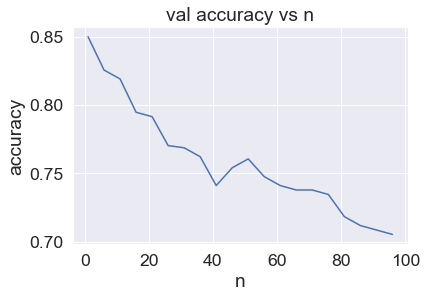

In [63]:
acc_val_list=gs.cv_results_['mean_test_score']
n_list = gs.param_grid['n_neighbors']
best_index = acc_val_list.argmax(axis=0)
best_model = n_list[best_index]
print("Best model:", best_model)

fig, ax = plt.subplots()
ax.plot(gs.param_grid['n_neighbors'], acc_val_list)
ax.set_title('val accuracy vs n')
ax.set_xlabel('n')
ax.set_ylabel('accuracy')

In [64]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = best_model)
model.fit(X_train, Y_train)
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)
acc_train = model.score(X_train, Y_train)
acc_val = model.score(X_test, Y_test)    
print(acc_train)
print(acc_val)

1.0
0.881664499349805
